**I- Algorithme de Fréquent Subgraph Mining**

In [1]:
from itertools import combinations
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import SpectralClustering

# Données d'entrée : Un ensemble de graphes représentés sous forme de listes d'arêtes. graph1= [("A", "B"), ("A", "C"), ("B", "D"), ("C", "D")]
graph1=[("A", "B"), ("A", "C"),("B", "D"), ("C", "D")]
graph2= [("E", "F"), ("A", "C")]
graph3=[("G", "H"), ("G", "I"), ("A", "c")]

graphs=[graph1, graph2, graph3]

In [2]:
# Fonction pour générer des sous-graphes candidats.
def generate_candidates (graph, k):
  candidates =set()
  nodes = set (node for edge in graph for node in edge)
  if k == 1:
    for node in nodes:
      candidates.add(frozenset([(node,)])) # Ajouter chaque nœud en tant que candidat
  else:
    for combination in combinations (nodes, k):
      edges = set()
      for node1 in combination:
          for node2 in combination:
            if node1 != node2 and (node1, node2) in graph:
              edges.add((node1, node2))
      if len(edges) == k (k-1) / 2:
          candidates.add(frozenset (edges))
  return candidates

In [3]:
# Fonction pour calculer la fréquence d'un sous-graphe candidat dans l'ensemble de graphes.
def count_frequency (candidate, graphs):
  count = 0
  for graph in graphs:
    subgraph_edges = set (graph)
    if candidate.issubset (subgraph_edges):
      count += 1
  return count

In [4]:
#seuil de support minimum
min_support=2

In [5]:
# Function to generate candidate subgraphs of size k
def generate_candidates(graph, k):
    candidates = set()
    for node1 in graph:
        for node2 in graph:
            edges = set()
            if node1 != node2 and (node1, node2) in graph:
                edges.add((node1, node2))
        if len(edges) == k * (k-1) / 2:
            candidates.add(frozenset(edges))
    return candidates

# Function to count the frequency of a candidate subgraph in a list of graphs
def count_frequency(candidate, graphs):
    count = 0
    for graph in graphs:
        if candidate.issubset(graph):
            count += 1
    return count

# Main code for extracting frequent subgraphs
frequent_subgraphs = []
min_support = 2  # Set your desired minimum support value

for k in range(1, 4):  # Assume we are looking for subgraphs of size 1 to 3
    candidates = generate_candidates(graph1, k)

    for candidate in candidates:
        support = count_frequency(candidate, graphs)
        if support >= min_support:
            frequent_subgraphs.append((set(candidate), support))


In [6]:
# Extraction des sous-graphes fréquents.
frequent_subgraphs = []
for i in range(1, 4): # Supposons que nous recherchons des sous-graphes de taille 1 à 3.
    candidates = generate_candidates(graph1, i)
    for candidate in candidates:
      support=count_frequency (candidate, graphs)
      if support >= min_support:
        frequent_subgraphs.append((set (candidate), support))


In [7]:
# Affichage des sous-graphes fréquents.
for subgraph, support in frequent_subgraphs:
  print (f"Sous-graphe fréquent: {subgraph}, Support: {support}")

Sous-graphe fréquent: set(), Support: 3


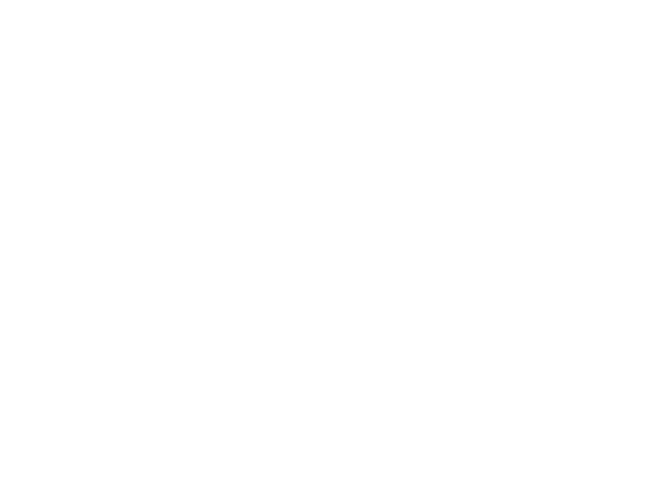

In [8]:
# Visualizing the frequent subgraphs
for subgraph, _ in frequent_subgraphs:
    G = nx.Graph(subgraph)
    nx.draw(G, with_labels=True, font_weight='bold')
    plt.show()

**II-Algorithme Spectral Clustering**

In [9]:
# Creation d'un graphe de reseau social aleatoire
G=nx.karate_club_graph()

In [10]:
#Creation de la matrice d'adjacence
adjacency_matrix=nx.to_numpy_array(G)

In [11]:
# Création de l'objet SpectralClustering
spectral_clustering = SpectralClustering (n_clusters=2, affinity='precomputed', random_state=42)

In [12]:
# Ajustement de l'algorithme sur les données
labels = spectral_clustering.fit_predict (adjacency_matrix)

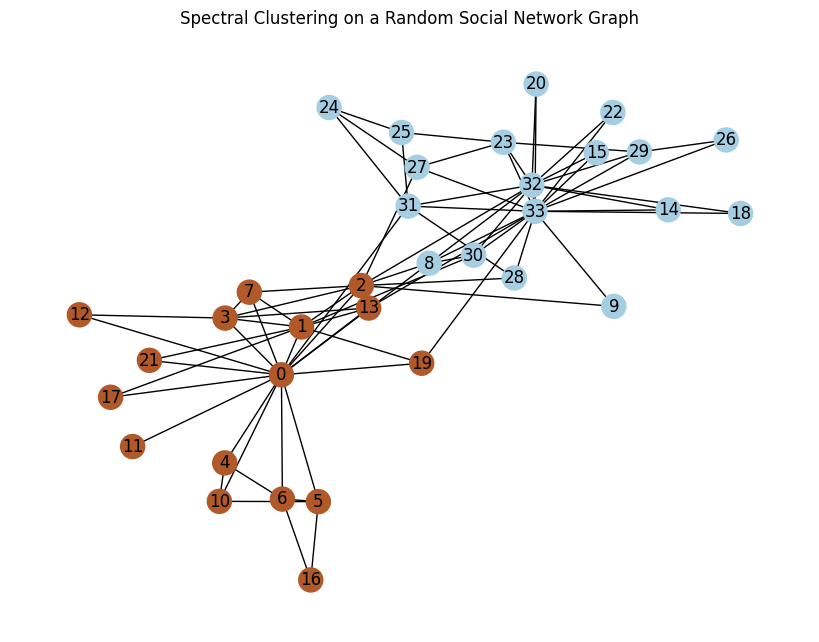

In [13]:
# Affichage des clusters obtenus
pos= nx.spring_layout(G)
plt.figure(figsize=(8, 6))
nx.draw(G, pos, node_color=labels, cmap=plt.cm.Paired, with_labels=True)
plt.title('Spectral Clustering on a Random Social Network Graph')
plt.show()

**III- Path Analysis Algorithms**

In [14]:
# Création d'un graphe de réseau social simplifié
G =nx.Graph()
G.add_edge('Alice', 'Bob')
G.add_edge('Bob', 'Carol')
G.add_edge('Carol', 'David')
G.add_edge('David', 'Eve')
G.add_edge('Eve', 'Frank')
G.add_edge('Frank', 'Grace')
G.add_edge('Alice', 'Ahmed')
G.add_edge('Ahmed', 'Mohamed')
G.add_edge('Eve', 'Mohamed')
G.add_edge('Eve', 'Bob')

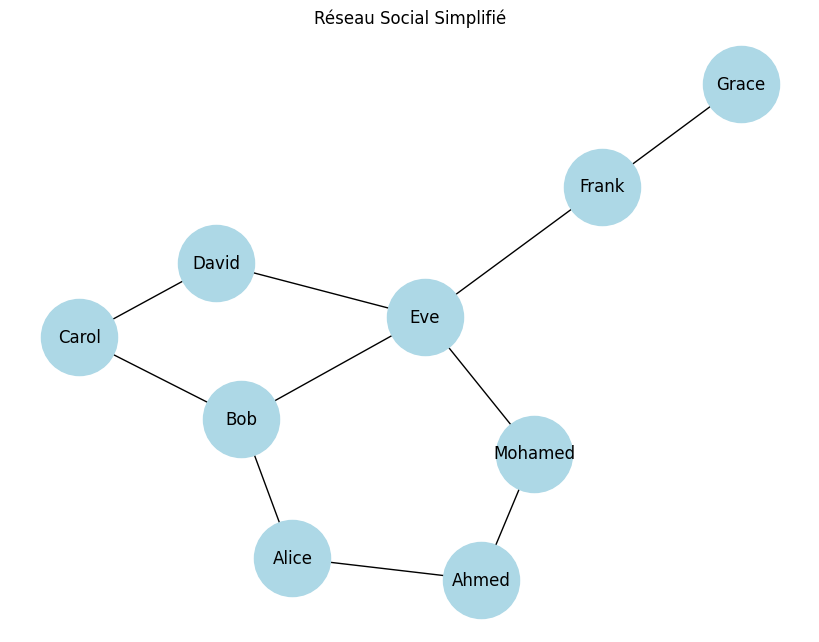

In [15]:
# Tracé du graphe pour visualisation
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue')
plt.title('Réseau Social Simplifié')
plt.show()

In [16]:
# Exemple d'analyse de chemin avec BFS
start_node = 'Eve'
target_node='Ahmed'

In [17]:
# Algorithme de recherche en largeur (BFS)
shortest_path = nx.shortest_path (G, source=start_node, target=target_node)
print (f"Chemin le plus court de {start_node} à {target_node}: {shortest_path}")

Chemin le plus court de Eve à Ahmed: ['Eve', 'Mohamed', 'Ahmed']
